In [153]:
import numpy as np
from numpy.random import poisson
from copy import deepcopy
import math

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate

In [154]:
class JackCarRental:
    def __init__(self, maximum_car=20):
        self._maximum_car = maximum_car + 1
        self.S = [(i, j) for i in range(self._maximum_car) for j in range(self._maximum_car)]
            
    def step(self, state, policy, req1, req2, ret1, ret2):
        
        r = 0.0

        cur1 = state[0]
        cur2 = state[1]
        
        lended_1 = min(state[0], req1)
        lended_2 = min(state[1], req2)
        
        cur1 -= lended_1
        cur2 -= lended_2
        
        r_1 = 10 * lended_1
        r_2 = 10 * lended_2
        
        r = r + r_1 + r_2
        
        to_move = max(min(policy[state], 5), -5)
        
        if to_move < 0:
            to_move = -1 * min(np.abs(to_move), cur2)
        else:
            to_move = min(to_move, cur1)
        
        r -= np.abs(to_move) * 2
        
        cur1 -= to_move
        cur2 += to_move
        
        cur1 = max(min(cur1, 20), 0)
        cur2 = max(min(cur2, 20), 0)
        
        cur1 += ret1
        cur2 += ret2
        
        cur1 = max(min(cur1, 20), 0)
        cur2 = max(min(cur2, 20), 0)
        
        return r, (cur1, cur2)

In [155]:
def poisson_prob(n, lbda):
    return (np.power(lbda, n) / np.math.factorial(n)) * np.exp(-lbda)

In [156]:
jcr = JackCarRental()
probs = {}
for req_1 in range(21):
    for req_2 in range(21):
        for ret_1 in range(21):
            for ret_2 in range(21):
                prob_req_1 = poisson_prob(req_1, 3)
                prob_req_2 = poisson_prob(req_2, 4)

                prob_ret_1 = poisson_prob(ret_1, 3)
                prob_ret_2 = poisson_prob(ret_2, 2)

                prob = prob_req_1 * prob_req_2 * prob_ret_1 * prob_ret_2
                
                probs[(req_1, req_2, ret_1, ret_2)] = prob

In [157]:
# policy evaluation

pi = {}
for s in jcr.S:
    pi[s] = 0.0

V = {}
for s in jcr.S:
    V[s] = 0.0

#V_copy = deepcopy(V)

theta = 4
k = 0
Lambda = 10
while Lambda > theta:
    Lambda = 0
    print(k)
    for s in jcr.S:
        v = V[s]
        sum_up = 0
        for req_1 in range(21):
            for req_2 in range(21):
                for ret_1 in range(21):
                    for ret_2 in range(21):                        
                        prob = probs[(req_1, req_2, ret_1, ret_2)]
                        
                        r, s_next = jcr.step(s, pi, req_1, req_2, ret_1, ret_2)
                        sum_up += prob * (r + 0.9 * V[s_next]) # maybe change for V_copy ?
        V[s] = sum_up
        Lambda = max(Lambda, np.abs(v-V[s]))
    print(k)
    print(Lambda)
    k += 1
    #V_copy = deepcopy(V)

0
0
193.3490478742842
1
1
134.00425974869282
2
2
90.45243676948172
3
3
67.59779036647129
4
4
53.584929928387226
5
5
41.720862240795384
6
6
32.720108750795134
7
7
26.08755552197863
8
8
21.778142815947092
9


KeyboardInterrupt: 

In [158]:
# policy improvement
policy_stable = True

for s in jcr.S:
    old_action = pi[s]
    a_max = 0
    v_max = 0
    for action in range(-5, 6):    
        s_next = (min(max(s[0]-action, 0), 20), min(max(s[1]+action, 0),20) )
        if V[s_next] > v_max:
            v_max = V[s_next]
            a_max = action
    pi[s] = a_max
    
    if old_action != pi[s]:
        policy_stable = False
    

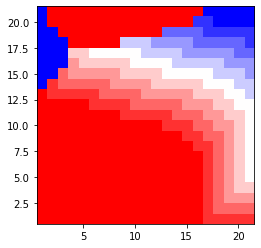

In [159]:
# Just some example data (random)
data = np.array([np.array([pi[(i,j)]  for j in range(21)]) for i in range(21)])

rows,cols = data.shape

plt.imshow(data, extent=[0.5, 0.5+cols, 0.5, 0.5+rows],cmap='bwr')

In [127]:
def plot_V(V):

    jcr = JackCarRental()
    X = np.array([i for i in range(21)])
    Y = np.array([i for i in range(21)])

    X, Y = np.meshgrid(X, Y)

    Z = np.array([V[s] for s in jcr.S])
    Z = np.reshape(Z, (21, 21))


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('# Cars at second location')
    ax.set_ylabel('# Cars at first location')
    ax.set_zlabel('value')

    ax.view_init(30, -80)

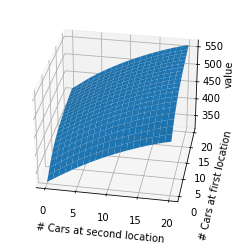

In [128]:
plot_V(V)

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 0.0,
 (0, 5): 0.0,
 (0, 6): 0.0,
 (0, 7): 0.0,
 (0, 8): 0.0,
 (0, 9): 0.0,
 (0, 10): 0.0,
 (0, 11): 0.0,
 (0, 12): 0.0,
 (0, 13): 0.0,
 (0, 14): 0.0,
 (0, 15): 0.0,
 (0, 16): 0.0,
 (0, 17): 0.0,
 (0, 18): 0.0,
 (0, 19): 0.0,
 (0, 20): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (1, 4): 0.0,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.0,
 (1, 8): 0.0,
 (1, 9): 0.0,
 (1, 10): 0.0,
 (1, 11): 0.0,
 (1, 12): 0.0,
 (1, 13): 0.0,
 (1, 14): 0.0,
 (1, 15): 0.0,
 (1, 16): 0.0,
 (1, 17): 0.0,
 (1, 18): 0.0,
 (1, 19): 0.0,
 (1, 20): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (2, 4): 0.0,
 (2, 5): 0.0,
 (2, 6): 0.0,
 (2, 7): 0.0,
 (2, 8): 0.0,
 (2, 9): 0.0,
 (2, 10): 0.0,
 (2, 11): 0.0,
 (2, 12): 0.0,
 (2, 13): 0.0,
 (2, 14): 0.0,
 (2, 15): 0.0,
 (2, 16): 0.0,
 (2, 17): 0.0,
 (2, 18): 0.0,
 (2, 19): 0.0,
 (2, 20): 0.0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (3, 5): 0.0,
 